# Comparing Classification Models for Cifar10 Dataset

In [1]:
#General Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes

## Part 1: Tensorflow Implementation and Visualizations

In [2]:
#All Imports for Tensorflow/Keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets

In the cell below I import the Cifar 10 dataset and print out the dimensions of each of the categories.  We can see that the X_train_images has a shape of (50000, 32, 32, 3).  This means that there are 50000 sample pictures, each picture has 32x32 pixels, and there is 3 RGB components meaning the images have color

In [3]:
#importing dataset
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.cifar10.load_data()

#printing dimensions of the train images, train labels, test images, and test labels:
print(f"The dimensions of the training images set is: {X_train_images.shape}")
print(f"The dimensions of the training labels set is: {y_train_labels.shape}")
print(f"The dimensions of the testing images set is: {X_test_images.shape}")
print(f"The dimensions of the testing images set is: {y_test_labels.shape}")

The dimensions of the training images set is: (50000, 32, 32, 3)
The dimensions of the training labels set is: (50000, 1)
The dimensions of the testing images set is: (10000, 32, 32, 3)
The dimensions of the testing images set is: (10000, 1)


### Dataset Exploration

Below I plot the first 20 images of the dataset just to get a good idea of what the images in the dataset look like.  Note that I have referenced https://www.tensorflow.org/tutorials/images/cnn for a general initial guide on how keras functions can be utilized since I have never used tensorflow or keras before

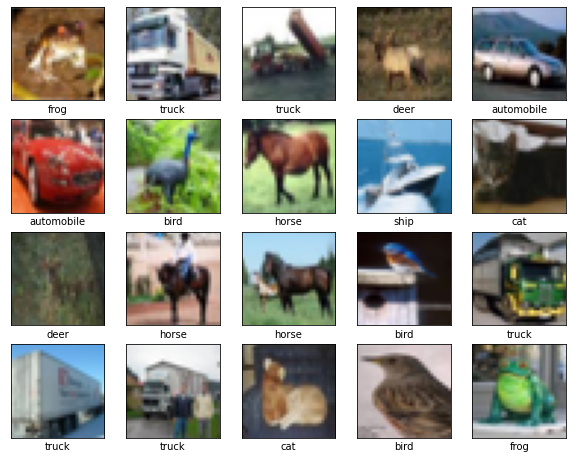

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]])
plt.show()

Next I visualize the RGB components of the first 3 images

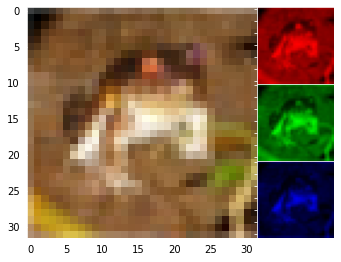

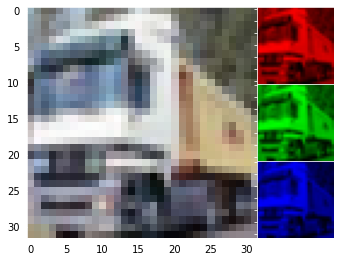

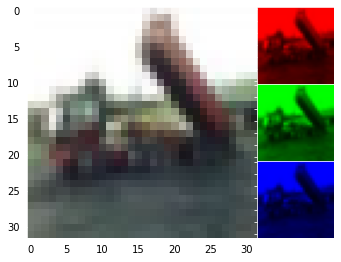

In [5]:
fig = plt.figure()
ax = RGBAxes(fig,[0.1,0.1,0.8,0.8])
ax.imshow_rgb(X_train_images[0,:,:,0],X_train_images[0,:,:,1],X_train_images[0,:,:,2])
plt.show()

fig = plt.figure()
ax = RGBAxes(fig,[0.1,0.1,0.8,0.8])
ax.imshow_rgb(X_train_images[1,:,:,0],X_train_images[1,:,:,1],X_train_images[1,:,:,2])
plt.show()

fig = plt.figure()
ax = RGBAxes(fig,[0.1,0.1,0.8,0.8])
ax.imshow_rgb(X_train_images[2,:,:,0],X_train_images[2,:,:,1],X_train_images[2,:,:,2])
plt.show()



Next I make 3 histograms where I plot the distribution of R,G,and B contributions for the pixel (16,16) which is in the middle of the images.  From what I can see in the histograms it seems like the red component is normally distributed at this pixel.  However, the blue and green components have skewed distributions towards 0 meaning that most of the pictures don't have very large blue or green components in their central pixel.

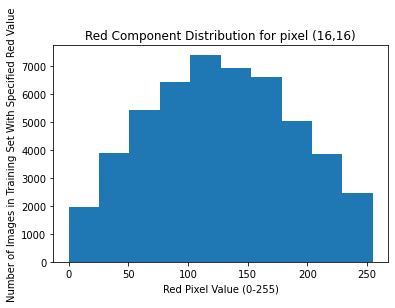

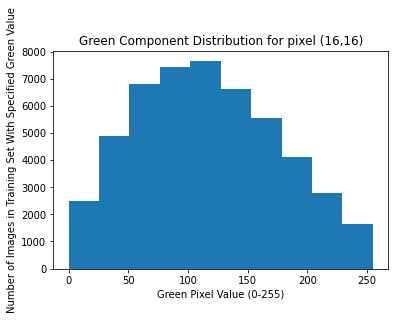

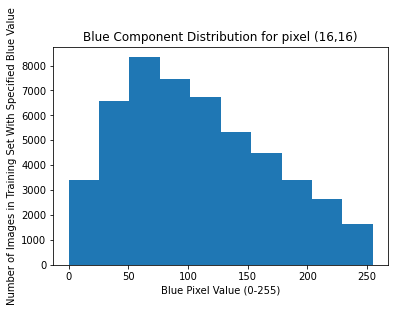

In [6]:
plt.hist(X_train_images[:,16,16,0])
plt.title('Red Component Distribution for pixel (16,16)')
plt.xlabel('Red Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Red Value')
plt.show()

plt.hist(X_train_images[:,16,16,1])
plt.title('Green Component Distribution for pixel (16,16)')
plt.xlabel('Green Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Green Value')
plt.show()

plt.hist(X_train_images[:,16,16,2])
plt.title('Blue Component Distribution for pixel (16,16)')
plt.xlabel('Blue Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Blue Value')
plt.show()

Below I make 3 more histograms showing the distribution of R,G,and B contributions for the pixel (0,0) which is on the edge of the images.  What is interesting here is that all 3 of these colors now have a large spike towards the 255 end of the scale!  I believe what this indicates is that many of the images in this dataset have light/white borders!

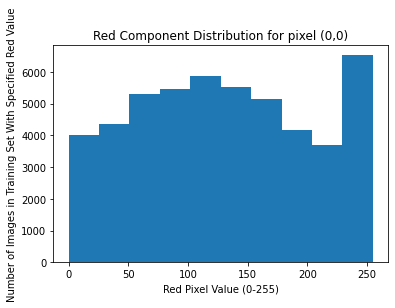

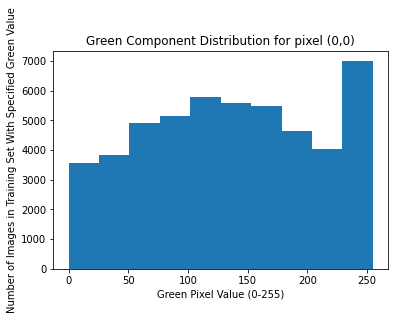

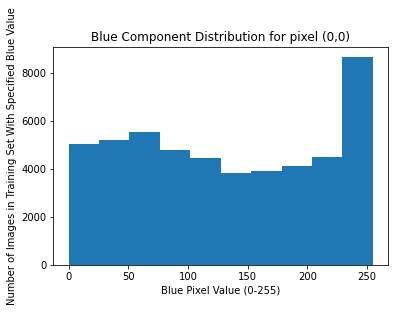

In [7]:
plt.hist(X_train_images[:,0,0,0])
plt.title('Red Component Distribution for pixel (0,0)')
plt.xlabel('Red Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Red Value')
plt.show()

plt.hist(X_train_images[:,0,0,1])
plt.title('Green Component Distribution for pixel (0,0)')
plt.xlabel('Green Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Green Value')
plt.show()

plt.hist(X_train_images[:,0,0,2])
plt.title('Blue Component Distribution for pixel (0,0)')
plt.xlabel('Blue Pixel Value (0-255)')
plt.ylabel('Number of Images in Training Set With Specified Blue Value')
plt.show()

### Sequential Model Implementation Using Keras

I now normalize the pixel values so that they are between 0 and 1 for the best neural network model performance.  Then I begin building a CNN where I will pass in the (32x32,3) images, have layers of convolutions and pooling, and ultimately predict the class that the image belongs in.  During training this model will use backpropogation to tune the node weights for the relu activation function appropriately so that it can make accurate predictions for new images that are inputted during the testing phase!

In [8]:
#First I Normalizing pixel values to be between 0 and 1
X_train_images, X_test_images = X_train_images / 255.0, X_test_images / 255.0

#Building model using Sequential API
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.summary()
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

2021-09-08 07:03:40.187564: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Here is where I am performing the training of my neural network using the training images and their corresponding labels! I am training the model for 10 epochs and my metric is accuracy.

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

results = model.fit(X_train_images, y_train_labels, epochs=10, 
                    validation_data=(X_test_images, y_test_labels))

2021-09-08 07:03:40.781315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5484 - accuracy: 0.4338 - val_loss: 1.2893 - val_accuracy: 0.5341
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1720 - accuracy: 0.5827 - val_loss: 1.0857 - val_accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0287 - accuracy: 0.6387 - val_loss: 0.9977 - val_accuracy: 0.6485
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9309 - accuracy: 0.6723 - val_loss: 0.9919 - val_accuracy: 0.6542
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8544 - accuracy: 0.6996 - val_loss: 0.9085 - val_accuracy: 0.6797
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8021 - accuracy: 0.7179 - val_loss: 0.9180 - val_accuracy: 0.6825
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7513 - accuracy: 0.7361 - val_loss: 0.9117 -

Below I am plotting the results of the model as it trained. We can see that the accuracy on the training set continually went up, however the validation accuracy didn't increase very much in the later epochs and sometimes even dipped down some.  This can be a common result of overfitting and in the future could be addressed by implementing dropout to the model!  Overall, tensorflow seems to be able to make a very accurate model (approximately 71% of the time it makes the correct decision which is much higher than the 10% that we would expect if it was making random guesses) which is a good thing, the only drawback is that it seems to take a long time to train!

313/313 - 1s - loss: 0.8705 - accuracy: 0.7073


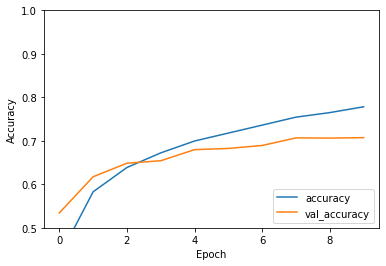

In [10]:
savedValAcc = results.history['val_accuracy'] #This I will use at the end when I am visually comparing the results 
                                              #of all the frameworks
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_images,  y_test_labels, verbose=2)

## Part 2: Scikit-Learn Implementation

In [11]:
#All imports for scikit-learn
from sklearn.neural_network import MLPClassifier

In [12]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train_images, X_test_images = X_train_images / 255.0, X_test_images / 255.0

In order to input into this MLPClassifier I first flatten each image into a flat vector to be fed into the neural network.  There may be a more optimal way to do this, but the scikitlearn framework seems very high level and hard to make customizable changes very easily.  This is definitely a drawback to this machine learning framework!  Ultimately this framework is able to produce a model that has an accuracy of about 41% after 10 iterations.  This is still much better than the 10% we would expect if the model was making random guesses, but it is much worse than the tensorflow model!

In [13]:
neuralNetworkModel = MLPClassifier(max_iter=10,solver='adam',verbose=10)
#neuralNetworkModel = MLPClassifier(max_iter=10,alpha=1e-4,solver='adam',verbose=10,learning_rate_init=0.1)
#I need to flatten out the data for each image to input!
flatXTrain = []
flatXTest = []
for i in range(len(X_train_images)):
    newVal = X_train_images[i].ravel()
    flatXTrain.append(newVal)
    
for i in range(len(X_test_images)):
    newVal = X_test_images[i].ravel()
    flatXTest.append(newVal)
    

neuralNetworkModel.fit(flatXTrain,y_train_labels)

print(f"Training set score: {neuralNetworkModel.score(flatXTrain,y_train_labels)}")
print(f"Testing set score: {neuralNetworkModel.score(flatXTest,y_test_labels)}")

/Applications/anaconda3/envs/deepLearning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.99697878
Iteration 2, loss = 1.81736082
Iteration 3, loss = 1.77378029
Iteration 4, loss = 1.73225684
Iteration 5, loss = 1.70920148
Iteration 6, loss = 1.68965623
Iteration 7, loss = 1.66884709
Iteration 8, loss = 1.65208598
Iteration 9, loss = 1.64914124
Iteration 10, loss = 1.63139456


/Applications/anaconda3/envs/deepLearning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.43698
Testing set score: 0.4208


## Part 3: Pytorch Implementation

In [14]:
#All imports for pytorch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

Note that for this section I have followed the following 2 guides very closely and not altered much of their source code! The primary purpose for this section was for me to get pytorch running locally, and see what kinds of results other people have been able to achieve on the cifar 10 dataset using pytorch so I can compare these results to my previous 2 sections/frameworks. (my goal here is not to claim I have implemented or changed things with pytorch myself since I have already spent so much time this period reading documentation for tensorflow and scikit-learn)  Instead I am just trying to understand what they did with some comments and compare results
The tutorial this code is following is: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

The large takeaways that I have gotten from following along with this tutorial is that pytorch seems to be a much lower level language than both scikitlearn and tensorflow/keras which leaves the user to do a lot more of the implementation details themselves.  The good side to this is that you have more flexibility to do exactly what you want with the model without as much guidance which could be good for researh settings where you are trying to build something completely novel.  However, the downside is I think that implementations in general will take much longer using this method and you will have to have very good knowledge of what you are doing to achieve good results.

With this being said looking at the overall accuracy this person achieved on the cifar10 dataset I can see that it was roughly 56% which means that it was better than the scikit-learn model, but worse than the tensorflow/keras model implemented above!

In [15]:
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   #convolutions using keras
        self.pool = nn.MaxPool2d(2, 2)     #maxpooling
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)   #this is how we do linear activation functions
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))       #pooling 
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)     #seems like they used SGD optimizer which is 
                                                                    #different from the adam optimizer I used above

In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/Applications/anaconda3/envs/deepLearning/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459065530/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.210
[1,  4000] loss: 1.856
[1,  6000] loss: 1.656
[1,  8000] loss: 1.586
[1, 10000] loss: 1.500
[1, 12000] loss: 1.462
[2,  2000] loss: 1.384
[2,  4000] loss: 1.386
[2,  6000] loss: 1.334
[2,  8000] loss: 1.333
[2, 10000] loss: 1.309
[2, 12000] loss: 1.303
Finished Training


In [21]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %
